# Spotify Genre Classification 

## Getting the Data - Scraping and Spotify API

### explaining the functions of API:
the target : to create a dataFrame that contains the information from the billabord charts and from spotify. the information from spotify is the id of each song that is in the billaboard chart.

We get the id of the song,which is the connection between the billabord info and the spotify info (we take each song and artist name from the billabord chart and search for the specific song id in order to get the features that we want to check on each song, in order to classify which song is a hit or not , i.e. which song is popular and which isn't (by the popularity column, which we turned from numeric to catagorial (yes/no).

In addition to getting the id - with get_id_of_songs() function, that uses other functions : get_key(val) and find_id(song,result), this function also returns the uri , the song features that we will use in the dataFrame and also info about the artist ( with find_artist_info(result) ) , which includes the 'popularity' feature , which is out target variable.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize
import requests 
import scipy.stats as stats
import datetime
import base64
clientid = '4d7f3ed374354cbf848b72bc270abedd'
secretid = '7c9935d59cbc417e8ac74ad8d7e06a6e'
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2019')
print(f'Total tables: {len(table_MN)}')
df1 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2018')
df2 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2017')
df3 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2016')
df4 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2015')
df5 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2014')
df6 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2013')
df7 = table_MN[1]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2012')
df8 = table_MN[1]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2011')
df9 = table_MN[0]
# table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2010')
# df10 = table_MN[0]
# table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2009')
# df11 = table_MN[0]
# table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2008')
# df12 = table_MN[0]
# table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2007')
# df13 = table_MN[0]
# table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2006')
# df14 = table_MN[0]

frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9]
#           ,df10 ,df11 ,df12 ,df13 ,df14]


## todo: get more data, and really scrape this.
all_songs_list = pd.concat(frames)

Total tables: 2


In [2]:
# print(all_songs_list)

In [3]:
# sp.search("lsdjlk asfklfafas", limit=1,type='track')

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [5]:
cid = "3b41c863d85746899b1bd17a39149f8e"
secret = "631b736a77d545e4a822bea470435cea"

In [6]:
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [7]:
import re

song_results = []
for index, row in all_songs_list.iterrows():
    song_rank = row['No.']
    artist_original_name = row['Artist(s)']
    artist_names = re.split('featuring | and | ,',artist_original_name)
    artist_names.append(artist_original_name)
    for name in artist_names:
        query = "track:"+row['Title']+" artist:"+name
        query = query.replace('"','')
        search_result = sp.search(query, limit=1,type='track')
        if len(search_result['tracks']['items']) != 0:
            song_entity ={'rank':song_rank,'result':search_result}
            song_results.append(song_entity)
            break
#         song_queries.append(query)

#### get the artist/band name , in order to search for the song title in the find_id() function

In [8]:
# so we will get an additinal info about the artist and the song - genre , popularity and etc.
def find_artist_info(result):
    for data in result['tracks']['items']:
        for key,value in data.items():
                if (key=='artists'): 
                      return (value[0]['id'])  


In [9]:
#find_artist_info(result)

In [10]:
def get_song_features(song_entity):
    search_result = song_entity['result']
    track_uri = search_result['tracks']['items'][0]['uri']
    track_features = sp.audio_features(track_uri)[0]
    artist_id = search_result['tracks']['items'][0]['artists'][0]['id']
    artist_info = sp.artist(artist_id)
    artist_popularity = artist_info['popularity']
    artist_genre = artist_info['genres'][0]
    
    features = track_features
    features['genre'] = artist_genre
    features['popularity'] = artist_popularity
    features['rank'] = song_entity['rank']

    return features

In [11]:
# constant1 = "track:Overshadows artist:Shredhead"
# get_song_features(constant1)

def get_songs_df(song_entities):
    song_list = []
    for ent in song_entities:
        try:
            song_features = get_song_features(ent)
            song_list.append(song_features)
        except:
            print(ent['result'])
            print("song was not found!")
    
    return pd.DataFrame(song_list)

# Introduction to the problem

### What is Classification?

A classification algorithm takes a dataset of labelled examples as inputs to produce a model that can take unlabeled new data and automatically assign labels to the unlabeled example.

If the classification problem has a set of two labels (for instance “spam” or “not spam”) then it is a binary classification problem. Multi-class classification is a problem where the number of labels within the set is three or greater. 

The problem that we are looking at is a multi-class as there are many genres within the set.

### our independent features/variables: 

#### A. from spotify API track info:

#### B. from spotify API artist info:

#### C. from billaboard charts' scraping: 
     rank- song position
     

## What is the target column?
our target column (dependent feature): genre
    
genre is the music type which the song is accosiated to
in the data aquisition process, we only took the rifst genre the song is accosiated to.

our aprior ideas:
   
   * the features 'danceability', 'energy', loudness ,instrumentalness ,speechiness, liveness', pop and tempo have high        correlation to the genre feature, so they are good features to use in order to classify the songs' genre.
    this is due to the fact that those features are linked very strongl to specific genres.
    
for example, a pop song has a big likelihood to have high danceability, energy, loudness and pop (popularity), whereas a rock song has a big likelihood to have high loudness and instrumentalness, in comparison to a country song that is likely to have low loudness and high acousticness	.

* the rank feature may be helpful to classify the songs' genre since we know that most of the song that has high ranking are classified as pop songs or rap/hip hop songs.


#  getting to know the data

In [12]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

#for preprocessing part
from scipy import stats

In [13]:
#DataFrame of all our songs
songs_df = get_songs_df(song_results)

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3AJuju+on+That+Beat+%28TZ+Anthem%29+artist%3AZay+Hilfigerrr+%26+Zayion+McCall&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'compilation', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0LyfQWJT6nXafLPZqxe9Of'}, 'href': 'https://api.spotify.com/v1/artists/0LyfQWJT6nXafLPZqxe9Of', 'id': '0LyfQWJT6nXafLPZqxe9Of', 'name': 'Various Artists', 'type': 'artist', 'uri': 'spotify:artist:0LyfQWJT6nXafLPZqxe9Of'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3AI+Hate+U%2C+I+Love+U+artist%3AGnash+&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'compilation', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0LyfQWJT6nXafLPZqxe9Of'}, 'href': 'https://api.spotify.com/v1/artists/0LyfQWJT6nXafLPZqxe9Of', 'id': '0LyfQWJT6nXafLPZqxe9Of', 'name': 'Various Artists', 'type': 'artist', 'uri': 'spotify:artist:0LyfQWJT6nXafLPZqxe9Of'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3ASomebody+artist%3ANatalie+La+Rose+&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2qdONMCoDngQk0eV4Avs1i'}, 'href': 'https://api.spotify.com/v1/artists/2qdONMCoDngQk0eV4Avs1i', 'id': '2qdONMCoDngQk0eV4Avs1i', 'name': 'Natalie La Rose', 'type': 'artist', 'uri': 'spotify:artist:2qdONMCoDngQk0eV4Avs1i'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI'

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3ATry+artist%3APink&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0LyfQWJT6nXafLPZqxe9Of'}, 'href': 'https://api.spotify.com/v1/artists/0LyfQWJT6nXafLPZqxe9Of', 'id': '0LyfQWJT6nXafLPZqxe9Of', 'name': 'Various Artists', 'type': 'artist', 'uri': 'spotify:artist:0LyfQWJT6nXafLPZqxe9Of'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3AJust+Can%27t+Get+Enough+artist%3AThe+Black+Eyed+Peas&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2sRLpduglJUzDQNnrsJudx'}, 'href': 'https://api.spotify.com/v1/artists/2sRLpduglJUzDQNnrsJudx', 'id': '2sRLpduglJUzDQNnrsJudx', 'name': 'The Singles', 'type': 'artist', 'uri': 'spotify:artist:2sRLpduglJUzDQNnrsJudx'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3AThe+Time+%28Dirty+Bit%29+artist%3AThe+Black+Eyed+Peas&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4gOdU6Z2qCcy7x63Fcpt2C'}, 'href': 'https://api.spotify.com/v1/artists/4gOdU6Z2qCcy7x63Fcpt2C', 'id': '4gOdU6Z2qCcy7x63Fcpt2C', 'name': 'The Great Pop Crew', 'type': 'artist', 'uri': 'spotify:artist:4gOdU6Z2qCcy7x63Fcpt2C'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', '

In [14]:
songs_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,popularity,rank
0,0.878,0.619,6,-5.560,1,0.1020,0.053300,0.000000,0.1130,0.639,...,audio_features,2YpeDb67231RjR0MgVLzsG,spotify:track:2YpeDb67231RjR0MgVLzsG,https://api.spotify.com/v1/tracks/2YpeDb67231R...,https://api.spotify.com/v1/audio-analysis/2Ype...,157067,4,lgbtq+ hip hop,90,1
1,0.760,0.479,2,-5.574,1,0.0466,0.556000,0.000000,0.0703,0.913,...,audio_features,3KkXRkHbMCARz0aVfEt68P,spotify:track:3KkXRkHbMCARz0aVfEt68P,https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...,https://api.spotify.com/v1/audio-analysis/3KkX...,158040,4,dfw rap,91,2
2,0.752,0.488,6,-7.050,1,0.0705,0.297000,0.000009,0.0936,0.533,...,audio_features,5p7ujcrUXASCNwRaWNHR1C,spotify:track:5p7ujcrUXASCNwRaWNHR1C,https://api.spotify.com/v1/tracks/5p7ujcrUXASC...,https://api.spotify.com/v1/audio-analysis/5p7u...,201661,4,dance pop,87,3
3,0.701,0.425,7,-10.965,1,0.3750,0.328000,0.130000,0.1000,0.562,...,audio_features,2Fxmhks0bxGSBdJ92vM42m,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4,art pop,92,4
4,0.829,0.539,11,-7.359,0,0.2080,0.136000,0.000002,0.1030,0.388,...,audio_features,7xQAfvXzm3AkraOtGPWIZg,spotify:track:7xQAfvXzm3AkraOtGPWIZg,https://api.spotify.com/v1/tracks/7xQAfvXzm3Ak...,https://api.spotify.com/v1/audio-analysis/7xQA...,149547,4,dfw rap,91,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,0.485,0.701,8,-3.807,1,0.0288,0.039000,0.000000,0.0977,0.613,...,audio_features,2TAcwD5KcV9uY3O1tLGV15,spotify:track:2TAcwD5KcV9uY3O1tLGV15,https://api.spotify.com/v1/tracks/2TAcwD5KcV9u...,https://api.spotify.com/v1/audio-analysis/2TAc...,184920,4,contemporary country,53,96
856,0.482,0.833,5,-5.611,1,0.0449,0.000346,0.000000,0.3650,0.740,...,audio_features,1fBl642IhJOE5U319Gy2Go,spotify:track:1fBl642IhJOE5U319Gy2Go,https://api.spotify.com/v1/tracks/1fBl642IhJOE...,https://api.spotify.com/v1/audio-analysis/1fBl...,212293,4,modern alternative rock,72,97
857,0.691,0.454,6,-9.130,1,0.0256,0.437000,0.002270,0.0783,0.350,...,audio_features,1t2hJFgJyUPD2crOafMUEk,spotify:track:1t2hJFgJyUPD2crOafMUEk,https://api.spotify.com/v1/tracks/1t2hJFgJyUPD...,https://api.spotify.com/v1/audio-analysis/1t2h...,242840,4,contemporary country,74,98
858,0.667,0.381,3,-7.494,1,0.0294,0.455000,0.000000,0.1160,0.199,...,audio_features,3U8dHeggJ8IBe0UCb1gbyB,spotify:track:3U8dHeggJ8IBe0UCb1gbyB,https://api.spotify.com/v1/tracks/3U8dHeggJ8IB...,https://api.spotify.com/v1/audio-analysis/3U8d...,273893,4,contemporary country,75,99


#  preprocessing of the data

In [15]:
songs_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,popularity,rank
0,0.878,0.619,6,-5.560,1,0.1020,0.0533,0.000000,0.1130,0.639,...,audio_features,2YpeDb67231RjR0MgVLzsG,spotify:track:2YpeDb67231RjR0MgVLzsG,https://api.spotify.com/v1/tracks/2YpeDb67231R...,https://api.spotify.com/v1/audio-analysis/2Ype...,157067,4,lgbtq+ hip hop,90,1
1,0.760,0.479,2,-5.574,1,0.0466,0.5560,0.000000,0.0703,0.913,...,audio_features,3KkXRkHbMCARz0aVfEt68P,spotify:track:3KkXRkHbMCARz0aVfEt68P,https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...,https://api.spotify.com/v1/audio-analysis/3KkX...,158040,4,dfw rap,91,2
2,0.752,0.488,6,-7.050,1,0.0705,0.2970,0.000009,0.0936,0.533,...,audio_features,5p7ujcrUXASCNwRaWNHR1C,spotify:track:5p7ujcrUXASCNwRaWNHR1C,https://api.spotify.com/v1/tracks/5p7ujcrUXASC...,https://api.spotify.com/v1/audio-analysis/5p7u...,201661,4,dance pop,87,3
3,0.701,0.425,7,-10.965,1,0.3750,0.3280,0.130000,0.1000,0.562,...,audio_features,2Fxmhks0bxGSBdJ92vM42m,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4,art pop,92,4
4,0.829,0.539,11,-7.359,0,0.2080,0.1360,0.000002,0.1030,0.388,...,audio_features,7xQAfvXzm3AkraOtGPWIZg,spotify:track:7xQAfvXzm3AkraOtGPWIZg,https://api.spotify.com/v1/tracks/7xQAfvXzm3Ak...,https://api.spotify.com/v1/audio-analysis/7xQA...,149547,4,dfw rap,91,5


In [16]:
pd.DataFrame(data={'features': songs_df.columns})

,features
0,danceability
1,energy
2,key
3,loudness
4,mode
5,speechiness
6,acousticness
7,instrumentalness
8,liveness
9,valence


## dealing with null values

In [17]:
songs_df.isnull().any()

danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
type                False
id                  False
uri                 False
track_href          False
analysis_url        False
duration_ms         False
time_signature      False
genre               False
popularity          False
rank                False
dtype: bool

In [18]:
# # import missingno as msno
# # msno.bar(songs_df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
# songs_df["genre"].isnull().value_counts()
# dropping NULL values
songs_df = songs_df.dropna(axis=0)

In [19]:
songs_df["genre"].isnull().value_counts()

False    860
Name: genre, dtype: int64

we see that there are a lot of dirrerent genres, so we will reduce them: 

In [20]:
# coverting sub-genres to main genre
def replace_genre(genre,song,index,songs_df):
    if genre in song['genre']:
        song['genre'] = genre
        songs_df.loc[index] = song

In [21]:
# calling replace_genre method
for index, song in songs_df.iterrows():
    replace_genre("hip hop",song,index,songs_df)
    replace_genre("rap",song,index,songs_df)
    replace_genre("pop",song,index,songs_df)
    replace_genre("rock",song,index,songs_df)
    replace_genre("country",song,index,songs_df)


In [22]:
# to make sure we didn't miss any genre
songs_df = songs_df.replace({'genre': {"album rock": "rock", "glam rock": "rock", "dance rock":"rock", "art rock":"rock",
                                  "soft rock":"rock", "country rock": "rock", "classic rock":"rock", "blues rock":"rock", "celtic rock":"rock",
                                  "australian rock":"rock", "german alternative rock":"rock", "alternative rock":"rock", "dance pop":"pop",
                                "brill building pop": "pop", "europop": "pop", "barbadian pop": "pop", "classic uk pop":"pop", 
                                "new wave pop":"pop", "canadian pop":"pop", "art pop":"pop", "belgian pop": "pop", "britpop": "pop", 
                                "italian pop":"pop", "classic danish pop": "pop", "bow pop": "pop", "baroque pop": "pop", "bubblegum pop": "pop",
                                "afropop":"pop", "hip pop":"pop", "atl hip hop": "hip hop", "east coast hip hop": "hip hop", "detroit hip hop":"hip hop", 
                                "bronx hip hop": "hip hop", "bubblegum dance": "dance", "eurodance":"dance", "belgian dance":"dance", "german dance": "dance",
                                "classic soul": "soul", "british soul": "soul", "chicago soul": "soul", "british folk": "folk", "american folk revival":"folk",
                                "drone folk":"folk","canadian folk":"folk", "deep adult standards":"adult standards", "glam metal": "metal", "alternative metal": "metal",
                                "acoustic blues":"blues", "british blues":"blues", "louisiana blues":"blues", "g funk":"funk", "brit funk":"funk",
                                "afrobeat":"dance", "british invasion":"rock", "doo-wop":"blues", "boy band":"pop", "merseybeat":"rock-and-roll", "blue":"blues",
                                                "bebop":"jazz", "avant-garde jazz":"jazz", "boogaloo": "latin", "big room": "trance", "bubble trance":"trance", "glam punk":"rock",
                                                "australian talent show":"pop", "mellow gold":"rock", "hi-nrg": "dance", "neo mellow": "pop", "yodeling":"folk", "classic girl group":"pop",
                                                "british dance band":"jazz", "deep house":"dance", "uk garage": "dance", "chicago rap":"hip hop",
                                     "lgbtq+ hip hop":"hip hop", "dfw rap": "hip hop", "contemporary country":"country","canadian contemporary r&b":"contemporary r&b","alternative r&b":"contemporary r&b","neo soul":"soul","uk dance":"dance","australian dance":"dance","alternative dance":"dance","romanian house":"house","german house":"house","tropical house":"house"}})

<ipython-input-23-1aaf4cea79fc>:6: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, textprops={'fontsize': 14})


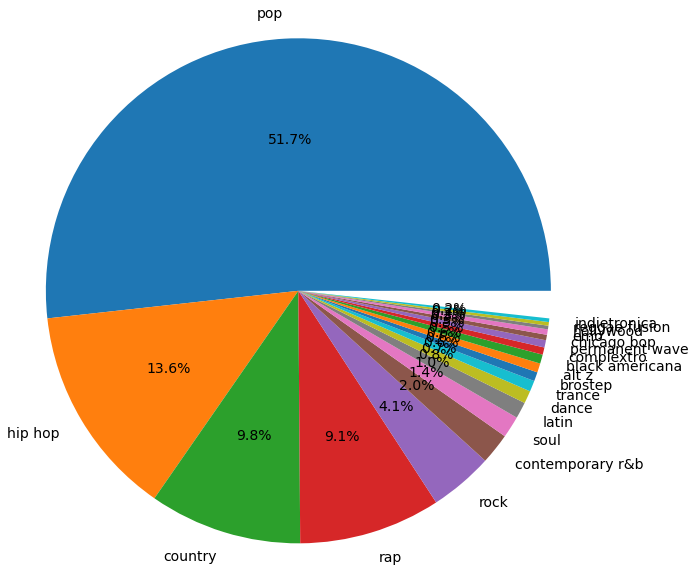

In [23]:
df_genre = songs_df['genre'].value_counts()[:20].sort_values(ascending=False) / len(songs_df)
sizes = df_genre.values.tolist()
labels = df_genre.index.values.tolist()
# Pie chart for genre
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, textprops={'fontsize': 14})
ax1.axis('equal')
# plt.title("Most Popular Genres\n" , bbox={'facecolor':'0.8', 'pad':0})
plt.show()

conclusion from the pie chart:
 pop, rap,hip hop and country are the most popular genres in the billaboard charts, by far from the other genres.

# dealing with outliers - later on!

In [56]:
songs_df['genre']

0      hip hop
1          rap
2          pop
3          pop
4          rap
        ...   
855    country
856       rock
857    country
858    country
859    hip hop
Name: genre, Length: 860, dtype: object

In [25]:
# ser=songs_df['genre']
# for genre in ser:
# #     if (songs_df['genre']==songs_df['genre'].all())
# #         songs_df.drop(label=genre)
#     if bool([ser.value_counts()<3]):
#             print(genre)
#             ser.drop(labels=genre)
        

In [115]:
songs_df['genre'].unique()

array(['hip hop', 'rap', 'pop', 'brostep', 'rock', 'country', 'latin',
       'black americana', 'complextro', 'contemporary r&b', 'alt z',
       'soul', 'dance', 'permanent wave', 'chicago bop', 'trance', 'emo',
       'reggae fusion', 'edm', 'hollywood', 'indietronica', 'funk',
       'house'], dtype=object)

In [116]:
songs_df['genre'].value_counts()

pop                 445
hip hop             117
country              84
rap                  78
rock                 35
contemporary r&b     17
soul                 12
latin                 9
dance                 7
trance                6
brostep               5
black americana       5
alt z                 5
permanent wave        4
complextro            4
chicago bop           3
emo                   3
edm                   1
house                 1
hollywood             1
reggae fusion         1
funk                  1
indietronica          1
Name: genre, dtype: int64

# check if its good later

In [140]:
def find_position(specific_genre):
    for key,genre in songs_df['genre'].iteritems():
        if(genre==specific_genre):
            print(key)
            
    return 

In [141]:
# find all the outliers of genre feature, i.e the genres that belongs to less than 3 songs
list=[]
for genre,count in songs_df['genre'].value_counts().iteritems():
    if bool(count<3):
#         list.append(genre)
          list.append(find_position(genre))


In [143]:
list

[]

In [120]:
# songs_df=songs_df.drop(labels=list,axis=1)

In [121]:
songs_df['genre']

0      hip hop
1          rap
2          pop
3          pop
4          rap
        ...   
855    country
856       rock
857    country
858    country
859    hip hop
Name: genre, Length: 845, dtype: object

In [126]:
ser=songs_df['genre']

In [127]:
songs_df['genre'].drop(labels=0)

1          rap
2          pop
3          pop
4          rap
5      brostep
        ...   
855    country
856       rock
857    country
858    country
859    hip hop
Name: genre, Length: 844, dtype: object

In [128]:
labels=list

In [129]:
songs_df['genre'].drop(labels=list)

0      hip hop
1          rap
2          pop
3          pop
4          rap
        ...   
855    country
856       rock
857    country
858    country
859    hip hop
Name: genre, Length: 839, dtype: object

In [130]:
songs_df['genre']=songs_df['genre'].drop(labels=list)

In [134]:
songs_df['genre'].value_counts()

pop                 445
hip hop             117
country              84
rap                  78
rock                 35
contemporary r&b     17
soul                 12
latin                 9
dance                 7
trance                6
black americana       5
brostep               5
alt z                 5
permanent wave        4
complextro            4
chicago bop           3
emo                   3
Name: genre, dtype: int64

In [132]:
# now , we need do drop all the rows with the null values. this accured because we deleted the outliers in the genres
songs_df=songs_df.dropna()

In [133]:
songs_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,house,indietronica,latin,permanent wave,pop,rap,reggae fusion,rock,soul,trance
0,0.878,0.619,6,-5.560,1,0.1020,0.053300,0.000000,0.1130,0.639,...,0,0,0,0,0,0,0,0,0,0
1,0.760,0.479,2,-5.574,1,0.0466,0.556000,0.000000,0.0703,0.913,...,0,0,0,0,0,1,0,0,0,0
2,0.752,0.488,6,-7.050,1,0.0705,0.297000,0.000009,0.0936,0.533,...,0,0,0,0,1,0,0,0,0,0
3,0.701,0.425,7,-10.965,1,0.3750,0.328000,0.130000,0.1000,0.562,...,0,0,0,0,1,0,0,0,0,0
4,0.829,0.539,11,-7.359,0,0.2080,0.136000,0.000002,0.1030,0.388,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,0.485,0.701,8,-3.807,1,0.0288,0.039000,0.000000,0.0977,0.613,...,0,0,0,0,0,0,0,0,0,0
856,0.482,0.833,5,-5.611,1,0.0449,0.000346,0.000000,0.3650,0.740,...,0,0,0,0,0,0,0,1,0,0
857,0.691,0.454,6,-9.130,1,0.0256,0.437000,0.002270,0.0783,0.350,...,0,0,0,0,0,0,0,0,0,0
858,0.667,0.381,3,-7.494,1,0.0294,0.455000,0.000000,0.1160,0.199,...,0,0,0,0,0,0,0,0,0,0


# dropping unnecessary features

In [79]:
songs_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'popularity', 'rank'],
      dtype='object')

In [80]:
#type has  only one value -  audio features , so we will drop it
songs_df['type']

0      audio_features
1      audio_features
2      audio_features
3      audio_features
4      audio_features
            ...      
855    audio_features
856    audio_features
857    audio_features
858    audio_features
859    audio_features
Name: type, Length: 845, dtype: object

In [81]:
#'id', 'uri', 'track_href', 'analysis_url' aren't linked to the song genre at all, so we can drop them 

In [82]:
songs_df=songs_df.drop(columns=['type','id', 'uri','track_href','analysis_url'])

# Dealing with Catagorials

In [83]:
#save a copy before we changed the catagorials
songs_df_copy=songs_df.copy()

In [84]:
songs_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'genre', 'popularity', 'rank'],
      dtype='object')

the only Catagorial feature is out target variable - genre

since this is  Nominal , i.e there is no particular order between different values of genres and also this this is not a binary (yes/no) column, we will use getDummies

In [92]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(sparse=False)
# ohe.fit_transform(songs_df[['genre']])

songs_df['genre']

0      hip hop
1          rap
2          pop
3          pop
4          rap
        ...   
855    country
856       rock
857    country
858    country
859    hip hop
Name: genre, Length: 845, dtype: object

In [98]:
dummies_genre=pd.get_dummies(songs_df['genre'])
merged_genre = pd.concat([songs_df,dummies_genre],axis='columns')
songs_df = merged_genre
songs_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,house,indietronica,latin,permanent wave,pop,rap,reggae fusion,rock,soul,trance
0,0.878,0.619,6,-5.560,1,0.1020,0.053300,0.000000,0.1130,0.639,...,0,0,0,0,0,0,0,0,0,0
1,0.760,0.479,2,-5.574,1,0.0466,0.556000,0.000000,0.0703,0.913,...,0,0,0,0,0,1,0,0,0,0
2,0.752,0.488,6,-7.050,1,0.0705,0.297000,0.000009,0.0936,0.533,...,0,0,0,0,1,0,0,0,0,0
3,0.701,0.425,7,-10.965,1,0.3750,0.328000,0.130000,0.1000,0.562,...,0,0,0,0,1,0,0,0,0,0
4,0.829,0.539,11,-7.359,0,0.2080,0.136000,0.000002,0.1030,0.388,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,0.485,0.701,8,-3.807,1,0.0288,0.039000,0.000000,0.0977,0.613,...,0,0,0,0,0,0,0,0,0,0
856,0.482,0.833,5,-5.611,1,0.0449,0.000346,0.000000,0.3650,0.740,...,0,0,0,0,0,0,0,1,0,0
857,0.691,0.454,6,-9.130,1,0.0256,0.437000,0.002270,0.0783,0.350,...,0,0,0,0,0,0,0,0,0,0
858,0.667,0.381,3,-7.494,1,0.0294,0.455000,0.000000,0.1160,0.199,...,0,0,0,0,0,0,0,0,0,0


In [99]:
songs_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,house,indietronica,latin,permanent wave,pop,rap,reggae fusion,rock,soul,trance
0,0.878,0.619,6,-5.560,1,0.1020,0.053300,0.000000,0.1130,0.639,...,0,0,0,0,0,0,0,0,0,0
1,0.760,0.479,2,-5.574,1,0.0466,0.556000,0.000000,0.0703,0.913,...,0,0,0,0,0,1,0,0,0,0
2,0.752,0.488,6,-7.050,1,0.0705,0.297000,0.000009,0.0936,0.533,...,0,0,0,0,1,0,0,0,0,0
3,0.701,0.425,7,-10.965,1,0.3750,0.328000,0.130000,0.1000,0.562,...,0,0,0,0,1,0,0,0,0,0
4,0.829,0.539,11,-7.359,0,0.2080,0.136000,0.000002,0.1030,0.388,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,0.485,0.701,8,-3.807,1,0.0288,0.039000,0.000000,0.0977,0.613,...,0,0,0,0,0,0,0,0,0,0
856,0.482,0.833,5,-5.611,1,0.0449,0.000346,0.000000,0.3650,0.740,...,0,0,0,0,0,0,0,1,0,0
857,0.691,0.454,6,-9.130,1,0.0256,0.437000,0.002270,0.0783,0.350,...,0,0,0,0,0,0,0,0,0,0
858,0.667,0.381,3,-7.494,1,0.0294,0.455000,0.000000,0.1160,0.199,...,0,0,0,0,0,0,0,0,0,0


In [97]:
songs_df['genre']

0      hip hop
1          rap
2          pop
3          pop
4          rap
        ...   
855    country
856       rock
857    country
858    country
859    hip hop
Name: genre, Length: 845, dtype: object

In [ ]:
# X1=songs_df.drop(['genre'],axis=1)
# y1=songs_df['genre']                 
# target_encode_multiclass(X1,y1)

# train test split

In [100]:
X = songs_df.drop(['genre'],axis=1)
Y = songs_df['genre']

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [102]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,house,indietronica,latin,permanent wave,pop,rap,reggae fusion,rock,soul,trance
0,0.878,0.619,6,-5.560,1,0.1020,0.053300,0.000000,0.1130,0.639,...,0,0,0,0,0,0,0,0,0,0
1,0.760,0.479,2,-5.574,1,0.0466,0.556000,0.000000,0.0703,0.913,...,0,0,0,0,0,1,0,0,0,0
2,0.752,0.488,6,-7.050,1,0.0705,0.297000,0.000009,0.0936,0.533,...,0,0,0,0,1,0,0,0,0,0
3,0.701,0.425,7,-10.965,1,0.3750,0.328000,0.130000,0.1000,0.562,...,0,0,0,0,1,0,0,0,0,0
4,0.829,0.539,11,-7.359,0,0.2080,0.136000,0.000002,0.1030,0.388,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,0.485,0.701,8,-3.807,1,0.0288,0.039000,0.000000,0.0977,0.613,...,0,0,0,0,0,0,0,0,0,0
856,0.482,0.833,5,-5.611,1,0.0449,0.000346,0.000000,0.3650,0.740,...,0,0,0,0,0,0,0,1,0,0
857,0.691,0.454,6,-9.130,1,0.0256,0.437000,0.002270,0.0783,0.350,...,0,0,0,0,0,0,0,0,0,0
858,0.667,0.381,3,-7.494,1,0.0294,0.455000,0.000000,0.1160,0.199,...,0,0,0,0,0,0,0,0,0,0


# Visualisation

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'speechiness'}>]], dtype=object)

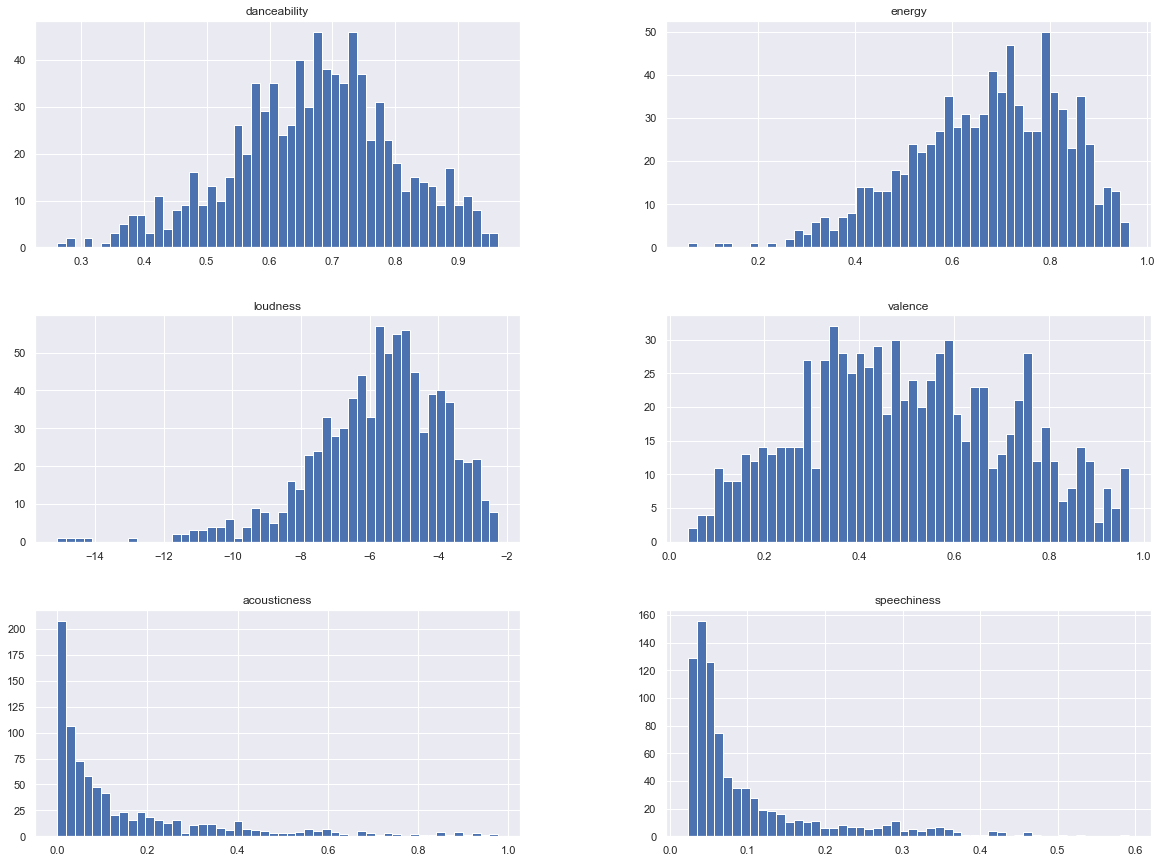

In [179]:
#let's take a look at the numeric attributes histograma:
atttibutes_hist = songs_df[["danceability", 'energy', 'loudness', 'valence','acousticness','speechiness']].hist(bins=50, figsize=(20,15))
atttibutes_hist

In [182]:
# #Finding out the skew for each attribute
# skew=train_numeric.skew()
# print(skew)

In [ ]:
Y

In [ ]:
X_train.columns

In [103]:
numerical_features=['danceability','energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'popularity', 'rank']

In [104]:
train_numeric=X_train[numerical_features]

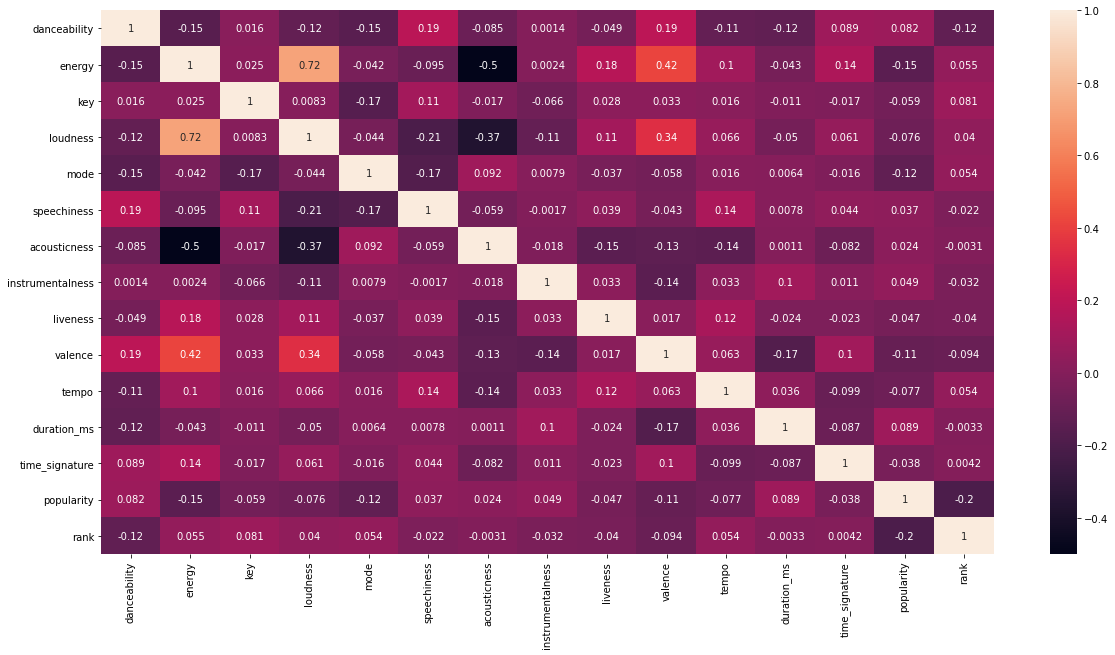

In [161]:
#checking correlation between numericals
plt.figure(figsize=(20,10))
sns.heatmap(train_numeric.corr(),annot=True);

features that have high correlation:
    
    *loudness and energy  - the more a song is loud, it has more energy 
    
    * pop and rank - the more the song is popular, the more its' rank is high
    
     * danceability  and speechiness - 
    
    * acousticness and mode - 
    
   * acousticness and danceability 
    
   *acousticness and energy 
   
   * loudness and valance - the more a song is loud, its' valance is high ( it is more happy and cheerful)
   
   some of these correlations are very intuitive

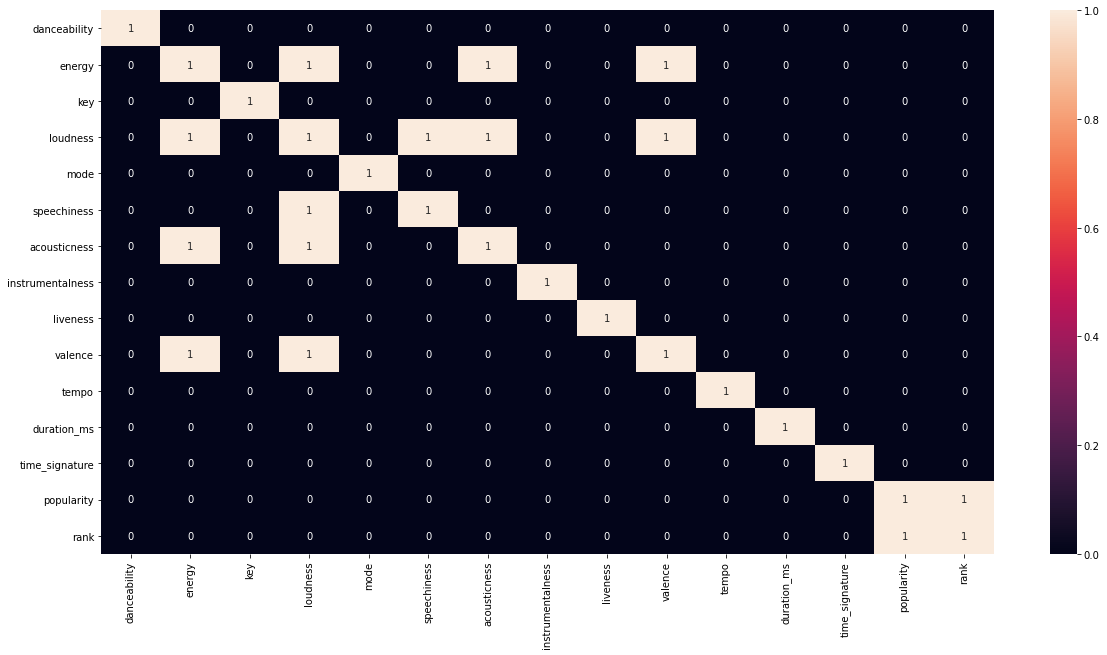

In [162]:
#checking correlation between numericals
plt.figure(figsize=(20,10))
sns.heatmap((corr_matrix > 0.2)|(corr_matrix< -0.2),annot=True);

In [106]:
train=train_numeric.copy()

In [107]:
train_numeric

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,rank
475,0.776,0.475,1,-9.459,1,0.0313,0.0120,0.000031,0.1560,0.415,119.990,190846,4,68,95
802,0.789,0.706,11,-4.233,0,0.0429,0.1120,0.000017,0.0586,0.638,125.911,235493,4,92,40
546,0.699,0.529,2,-7.548,1,0.0487,0.0317,0.000036,0.2850,0.121,119.987,206167,4,85,69
269,0.799,0.539,1,-6.351,1,0.0421,0.1990,0.000017,0.1650,0.394,136.948,202547,4,89,78
356,0.539,0.528,11,-8.113,0,0.2520,0.0108,0.000000,0.1170,0.252,190.169,228640,4,84,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.905,0.389,8,-14.505,1,0.3320,0.7400,0.162000,0.1060,0.196,120.046,193143,4,92,73
108,0.604,0.462,0,-7.053,1,0.0614,0.5580,0.000001,0.1310,0.378,60.260,215230,4,89,10
273,0.728,0.616,4,-4.238,1,0.0645,0.3780,0.000000,0.1050,0.508,99.962,181880,4,76,82
441,0.623,0.962,4,-2.616,0,0.0895,0.1030,0.000174,0.2640,0.676,149.963,211573,4,82,60


In [109]:
# plt.figure(figsize=(20,10))
# sns.heatmap(songs_df.corr(),annot=True);

In [ ]:
songs_df

In [147]:
corr_matrix.sort_values(ascending = False) 

NameError: name 'corr_matrix' is not defined

In [196]:
corr_matrix_add=songs_df.corr()
# corralations = corr_matrix['genre'].sort_values(ascending = False) 
high_corr_add=(corr_matrix_add > 0.2)|(corr_matrix_add< -0.2)
high_corr_add.iloc[15:60,:]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,house,indietronica,latin,permanent wave,pop,rap,reggae fusion,rock,soul,trance
alt z,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
black americana,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
brostep,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
chicago bop,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
complextro,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
contemporary r&b,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
country,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
dance,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
edm,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
emo,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [225]:
high_corr_add[high_corr_add==True]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,house,indietronica,latin,permanent wave,pop,rap,reggae fusion,rock,soul,trance
danceability,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
key,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mode,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
reggae fusion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
soul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [238]:
df=high_corr_add.iloc[15:60,0:15]

In [244]:
df[df['danceability']==True]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,rank
country,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True
hip hop,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False
country,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True
hip hop,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False


In [243]:
df[]

<bound method DataFrame.pop of                   danceability  energy    key  loudness   mode  speechiness  \
alt z                    False   False  False     False  False        False   
black americana          False   False  False     False  False        False   
brostep                  False   False  False     False  False        False   
chicago bop              False   False  False     False  False        False   
complextro               False   False  False     False  False        False   
contemporary r&b         False   False  False     False  False        False   
country                   True   False  False     False  False         True   
dance                    False   False  False     False  False        False   
edm                      False   False  False     False  False        False   
emo                      False   False  False     False  False        False   
funk                     False   False  False     False  False        False   
hip hop              

In [240]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,rank
alt z,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
black americana,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
brostep,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
chicago bop,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
complextro,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
contemporary r&b,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
country,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True
dance,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
edm,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
emo,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


highly correlated genres (to other features that are not genres):
country - speechiness
country, hip hop - danceability
country, hip hop-loudness
country - popularity

In [ ]:
the genres with the highest energy,loudness,speechiness and acousticness are:  

In [ ]:
this can help us in classifying out songs.

In [ ]:
conclusion: country, hip hop are highly correlated to a couple of features, 

In [224]:
# df[df==True]
# for row, col in df.iterrows():
#     if((df[row][col]==True)):
#         print(df[row][col])

In [188]:
corr_matrix_add=songs_df.corr()
# corralations = corr_matrix['genre'].sort_values(ascending = False) 
high_corr_add=(corr_matrix_add > 0.2)|(corr_matrix_add< -0.2)
high_corr_add.loc[:

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,house,indietronica,latin,permanent wave,pop,rap,reggae fusion,rock,soul,trance
danceability,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
energy,False,True,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
key,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
loudness,False,True,False,True,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
mode,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rap,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
reggae fusion,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
rock,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
soul,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


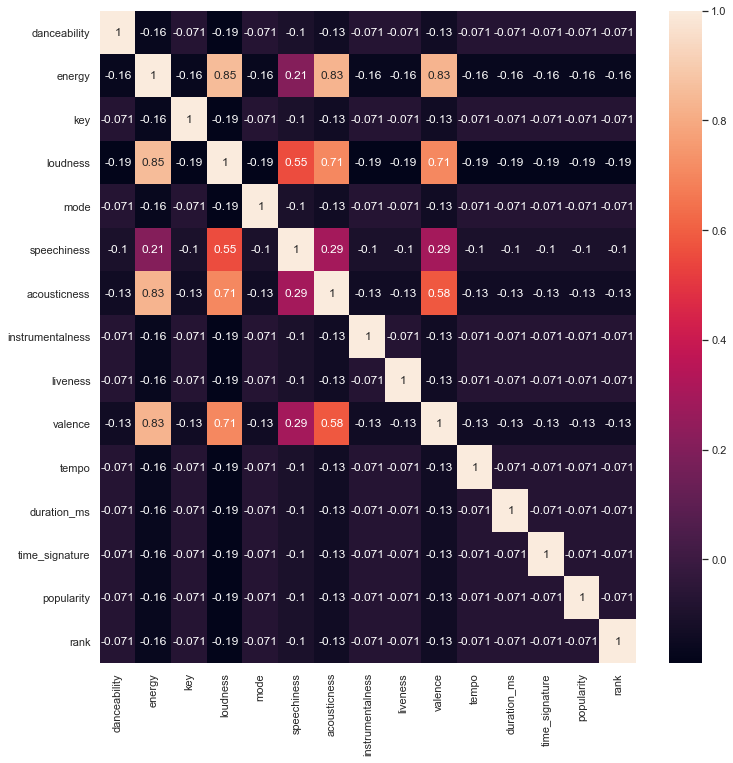

In [170]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(high_corr.corr(),annot=True)
sns.set(font_scale=1)

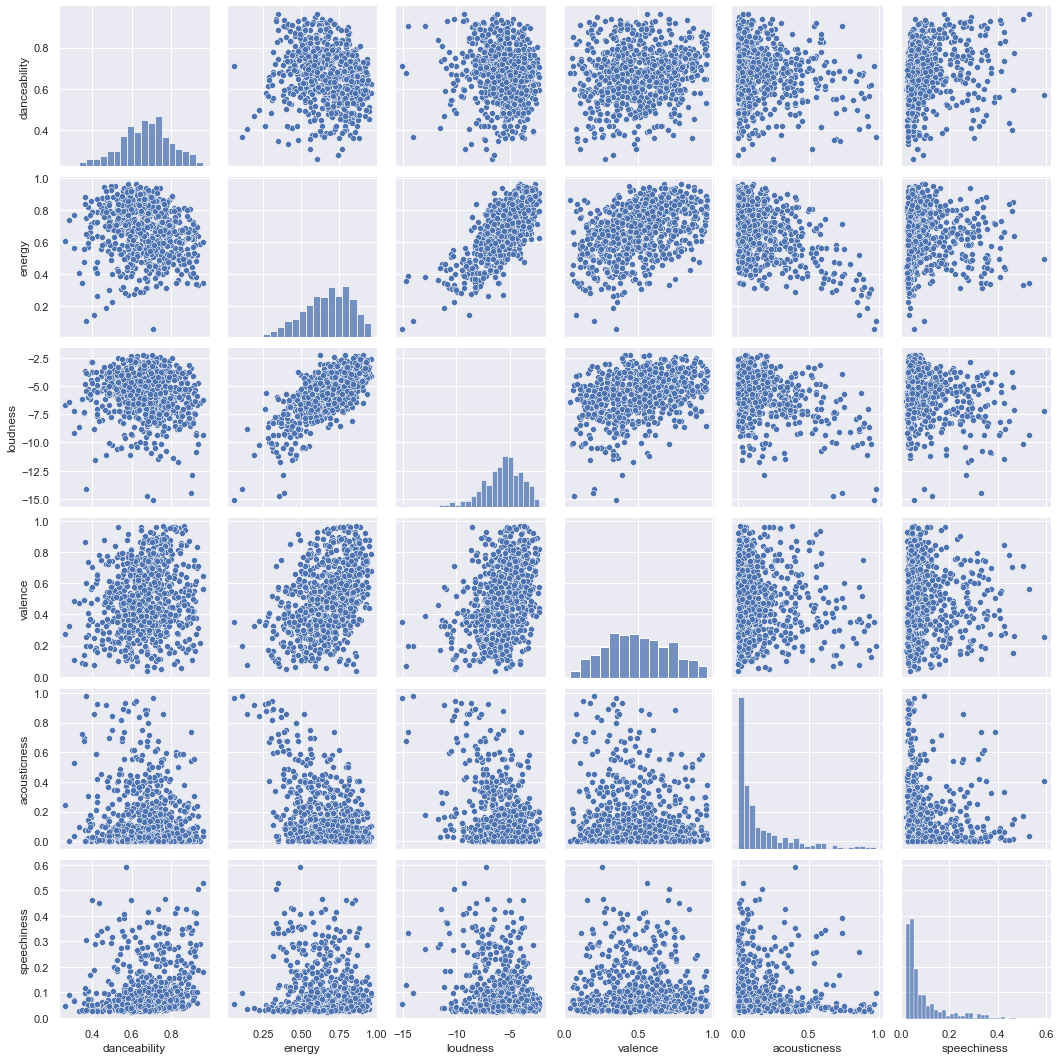

In [251]:
# looking at the most numeric correlated features
sns.pairplot(songs_df[["danceability", 'energy', 'loudness', 'valence','acousticness','speechiness']])

highly correlated and linear features: 
   * acousticness and energy
   * loudness and energy
   * energy and valance 
 
 less:
   * acousticness and loudness
   * energy and dancability

conclusion: energy is an important feature, we should keep it and might concider removing features that are highly correlated to it but less important.


'loudness' and 'acousticness' are highly correlated to 'energy', so we will drop them.

In [245]:
# sns.catplot(x="danceability", y="genre", kind="bar", data=songs_df)
# #, hue="class"

In [246]:
# sns.catplot(x="energy", y="genre",data=songs_df)

In [248]:
# sns.catplot(x="energy", y="genre",data=songs_df)

In [111]:
# fig, axes = plt.subplots(2, 2, figsize=(15, 15))
# fig.suptitle('categorial features:')

# sns.swarmplot(ax=axes[0,0], x="energy", y="genre", data=songs_df)
# sns.swarmplot(ax=axes[0,1], x="loudness", y="genre", data=songs_df)
# sns.swarmplot(ax=axes[1,0], x="speechiness", y="genre", data=songs_df)
# sns.swarmplot(ax=axes[1,1], x="acousticness", y="genre", data=songs_df)

In [249]:
# sns.stripplot(x="energy", y="genre", data=songs_df, jitter=0.05)


In [250]:
# sns.stripplot(x="loudness", y="genre", data=songs_df, jitter=0.05)

In [144]:
# from sklearn.feature_selection import chi2

In [ ]:
# X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

# dealing with unbalanced data

In [ ]:
sns.catplot(x="genre", kind="count", palette="ch:.25", data=songs_df)

#   מה 25.2 טיוטות

In [ ]:
songs={'Alice in Chains':'Them Bones','Beyonce':'Crazy In Love (feat. Jay-Z)','Glass Animals':'Heat Waves','Ed Sheeran':'The Joker And The Queen (feat. Taylor Swift)'}
song_names=songs.values()
artists_names=songs.keys()
song_names_list=list(song_names)

In [ ]:
#finding the id of the specific song with the song name and a dictionary that contains the artists info
def find_id(song,result):
    for data in result['tracks']['items']:
        for key,value in data.items():
            if (key=='name')&  (value==song):
                print(data['id'])
                print(data['uri'])
                print(sp.audio_features(data['uri'])[0])
                print(sp.artist(find_artist_info(result)))
                return 
               

In [ ]:
# unneccesary
# def get_key(val):
#     for key, value in songs.items():
#          if val == value:
#              return key
 
#     return "key doesn't exist"

In [ ]:
# unnessecay
# def get_id_of_songs():

#     # for song in song_names_list:

#     for song in song_names_list:
#         result = sp.search(get_key(song), limit=10)
#      #   print(result)
#         print("\n")
#         find_id(song,result)



In [ ]:
get_id_of_songs()

# טיוטות

In [ ]:
# for artist in artists_names:
#     art=sp.search(artist)

In [ ]:
#art

In [ ]:
#art['tracks']['items']

In [ ]:
#art['tracks']['items'][0]

In [ ]:
#art['tracks']['items']

In [ ]:
# #finding the id of the specific song with the song name and a dictionary that contains the artists info
# def find_id2(song,result):
#     for data in result['tracks']['items']:
#         for key,value in data.items():
#             if (key=='name')&  (value==song):
#                 print(data['id'])
#                 print(data['uri'])
#                 print(sp.audio_features(data['uri'])[0])
#                 print(sp.artist("64tNsm6TnZe2zpcMVMOoHL"))
#                 return 
               

In [ ]:

# find_id2('Them Bones',result)

In [ ]:
#  print(sp.artist(find_artist_id()))

In [ ]:

#  artists_names=songs.keys()
# def find_artist_id():
#         for key,value in art['tracks']['items'][0]['artists'][0].items():
#             if(key=='id'):
#                 print(value)
                   

In [ ]:
# def find_features(song,result):
#     for song in song_names_list:
#         result = sp.search(get_key(song), limit=10)
#         for data in result['tracks']['items']:
#             print(sp.audio_features("spotify:track:4A065x9kJt955eGVqf813g")[0])
#sp.artist("spotify:artist:6eUKZXaKkcviH0Ku9w2n3V")


In [ ]:
# get_id_of_songs()

In [ ]:
# art=sp.search(artist)

## כל מה שלמטה זה טיוטה

In [ ]:
# tracks = []

# playlist_link ="spotify:track:4A065x9kJt955eGVqf813g"
# #playlist_URI = playlist_link.split("/")[-1].split("?")[0]
# track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

# track_uri = track["track"]["uri"]

# #Track name
# track_name = track["track"]["name"]
    
# #Main Artist
# artist_uri = track["track"]["artists"][0]["uri"]
# artist_info = sp.artist(artist_uri)

# #Name, popularity, genre
# artist_name = track["track"]["artists"][0]["name"]
# artist_pop = artist_info["popularity"]
# artist_genres = artist_info["genres"]

# #Album
# album = track["track"]["album"]["name"]

# #Popularity of the track
# track_pop = track["track"]["popularity"]

# track_features = sp.audio_features(track_uri)[0]

# track_genre = 'None'
# if len(artist_genres)>0:
#     track_genre = artist_genres[0]

# track_features['genre'] = track_genre
# track_features['pop'] = track_pop
# track_features['name'] = track_name
# track_features['artist'] = artist_name
# tracks.append(track_features)

In [ ]:
# def find_artist_id0():
#     for song in song_names_list:
#         for data in art['tracks']['items']:
#             for key,value in data.items():
              
#                 if ((key=='uri') & (str(value).contains('a'))) :
#                     print(str(value))
#                     print (data['uri'])
#                     print('dgft')
#                     return
#                     #print(data['uri'])
        

In [ ]:
  #  print(result)
# for track in song_names_list:
#     #print(song_names_list[track])
#     if(track==result['tracks']['items'][0]['name']):
#         print(result['tracks']['items'][0]['name'])
# for item in a_dict.items():
# ...     print(item)

In [ ]:
# song_names_list

In [ ]:
# data.items()

In [ ]:
# result['tracks']

In [ ]:
# for data in result['tracks']['items']:
#     for key,value in data.items():
#         if (key=='name')&  (value==song_names_list[0]):
#             print(value)

In [ ]:
# result = sp.search(songs, type='track')

In [ ]:
# data.items()

In [ ]:
# song_names_list

In [ ]:
# result

In [ ]:
#result['tracks']['items'] - a list of dicts

In [ ]:
# result['tracks']['items']

In [ ]:
#print(result['tracks']['items'])

In [ ]:
# for data in result['tracks']['items']:
#     for key,value in data.items():
#         if (key=='name')&  (value==song_names_list[0]):
#             print(value)

In [ ]:
# for data in result['tracks']['items']:
#      for key in data:
#             if key=='name'& (value==song_names_list[0]):
#                 print(value)
   

In [ ]:
# for data in result['tracks']['items']:
#      for key in data.keys():
#             if key=='name':
#                 print(key)
   

In [ ]:
# for data in result['tracks']['items']:
#     print (data)